In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.dates import WeekdayLocator, \
# DateFormatter, MonthLocator, DateLocator

На анализ был взят датасет DDoS-атаки

In [2]:
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', header=0)
df.columns = [x.strip().lower().replace(' ', '_') for x in df.columns]
df['timestamp'] = pd.to_datetime(df.timestamp).dt.strftime('%H:%M:%S')

In [3]:
df.columns

Index(['flow_id', 'source_ip', 'source_port', 'destination_ip',
       'destination_port', 'protocol', 'timestamp', 'flow_duration',
       'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s',
       'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std',
       'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
  

In [4]:
df.head()

,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,total_backward_packets,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,03:30:00,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,03:30:00,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,03:30:00,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,03:30:00,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,03:30:00,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Строим График распредления количества запросов в секунду

In [7]:
ddos = df[['source_ip', 'timestamp']]
ddos_describe = ddos.groupby('timestamp').describe()
ddos_describe

source_ip                           
              count unique            top freq
timestamp                                     
03:30:00       1728    122   192.168.10.5  839
03:31:00       1905    159  192.168.10.16  648
03:32:00        386     66  192.168.10.17   61
03:33:00       1402    123   192.168.10.9  406
03:34:00        873    105  192.168.10.17  227
...             ...    ...            ...  ...
04:58:00        992     64  192.168.10.14  379
04:59:00        563     79  192.168.10.14  272
05:00:00       1106     72  192.168.10.15  407
05:01:00        287     52  192.168.10.14   48
05:02:00        159     50  192.168.10.19   28

[93 rows x 4 columns]

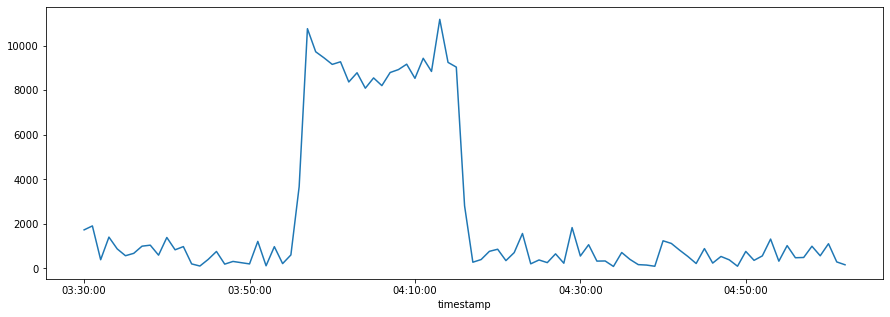

In [8]:
plt.figure(figsize=(15, 5))
ax = ddos_describe['source_ip']['count'].plot()

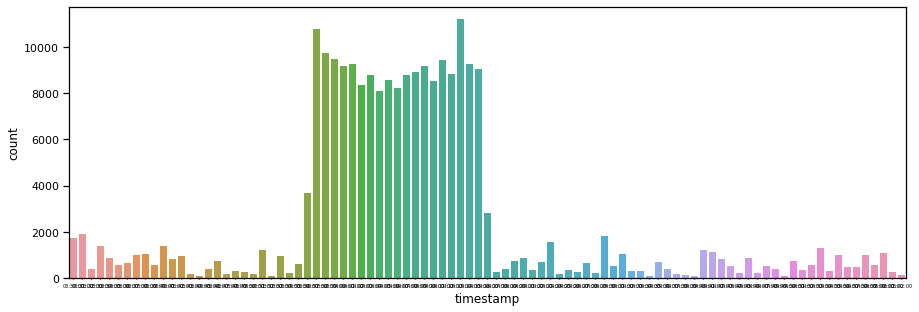

In [111]:
plt.figure(figsize=(15, 5))
sns.countplot(x='timestamp', data=ddos)
sns.set_context("notebook", rc={'xtick.labelsize': 5.0,
                                'xtick.major.size': 1.0,
                                'xtick.major.width': 1.25,
                                'xtick.minor.size': 4.0,
                                'xtick.minor.width': 2.0,})

In [59]:
ddos_describe['source_ip']['count'].sort_values(ascending=False).head(15)

timestamp
04:13:00    11188
03:57:00    10769
03:58:00     9731
03:59:00     9460
04:11:00     9438
04:01:00     9281
04:14:00     9254
04:09:00     9173
04:00:00     9164
04:15:00     9042
04:08:00     8930
04:12:00     8847
04:07:00     8799
04:03:00     8788
04:05:00     8556
Name: count, dtype: object

Более точно определяем интервал атаки

In [10]:
ddos_describe['source_ip']['count'][ddos_describe['source_ip']['count'] < 8556].sort_values(ascending=False).head(15)

timestamp
04:10:00    8538
04:02:00    8374
04:06:00    8210
04:04:00    8094
03:56:00    3671
04:16:00    2809
03:31:00    1905
04:29:00    1830
03:30:00    1728
04:23:00    1565
03:33:00    1402
03:40:00    1386
04:53:00    1314
04:40:00    1237
03:51:00    1210
Name: count, dtype: object

# Исследуем саму атаку

In [30]:
ddos_time = df[['timestamp', 'source_ip', 'source_port', 'destination_ip', 'destination_port', 'packet_length_std','packet_length_mean', 'label']][(df['timestamp'] >= '03:56:00')&(df['timestamp'] <= '04:14:00')]
ddos_time.source_port = ddos_time.source_port.astype(int)
ddos_time.packet_length_mean = ddos_time.packet_length_mean.astype(int)

Сравним сколько запросов попало в отфильтрованную выборку

In [51]:
ddos_time.label.value_counts()

DDoS      120414
BENIGN     47851
Name: label, dtype: int64

In [61]:
df.label.value_counts()

DDoS      128027
BENIGN     97718
Name: label, dtype: int64

In [104]:
(ddos_time.label.value_counts() / len(ddos_time.label)) * 100

DDoS      71.562119
BENIGN    28.437881
Name: label, dtype: float64

In [105]:
(df.label.value_counts() / len(df.label)) * 100

DDoS      56.713105
BENIGN    43.286895
Name: label, dtype: float64

Проанализуем куда поступали атаковавшие запросы

In [41]:
ddos_time.source_port.value_counts()

80       29717
443       1475
123         74
137         61
22          41
         ...  
19666        1
19665        1
19664        1
19663        1
9804         1
Name: source_port, Length: 45959, dtype: int64

In [35]:
ddos_time.source_ip.value_counts()

172.16.0.1        120411
192.168.10.50      29481
192.168.10.12       6036
192.168.10.15       2663
192.168.10.3        2169
                   ...  
172.217.10.66          1
52.84.8.26             1
23.194.100.143         1
216.58.212.131         1
8.43.72.47             1
Name: source_ip, Length: 606, dtype: int64

Предполгаем, что с ip 172.16.0.1 происходила ddos-атака

In [113]:
df[df.label == 'DDoS'].source_ip.value_counts()

172.16.0.1       128024
192.168.10.50         3
Name: source_ip, dtype: int64

In [114]:
df[df.label == 'DDoS'].destination_port.value_counts()

80       128024
64869         1
64873         1
27636         1
Name: destination_port, dtype: int64

Подтвердили наше предположение

Проверим с каких портов происходила атака

In [75]:
len(ddos_time[ddos_time.source_ip == '172.16.0.1'].source_port.unique())

43480

Установили, что атака шла с одного сервера, но с разных портов

Проверим куда шли запросы

In [79]:
ddos_time[ddos_time.source_ip == '172.16.0.1'].destination_ip.value_counts()

192.168.10.50    120411
Name: destination_ip, dtype: int64

In [78]:
ddos_time[ddos_time.source_ip == '172.16.0.1'].destination_port.value_counts()

80    120411
Name: destination_port, dtype: int64

In [115]:
df[(ddos_time.source_ip == '172.16.0.1') & (df.label == 'DDoS')].destination_ip.value_counts()

192.168.10.50    120411
Name: destination_ip, dtype: int64

In [116]:
df[(ddos_time.source_ip == '172.16.0.1') & (df.label == 'DDoS')].destination_port.value_counts()

80    120411
Name: destination_port, dtype: int64

Установили, что атака шла на 192.168.10.50:80

Сравним размеры пакетов

In [125]:
df[(df.label == 'DDoS')].packet_length_mean.value_counts()

6.000000       46571
1292.555556    14391
1163.300000     9476
1453.375000     8605
1162.700000     8374
               ...  
1056.454545        1
1163.900000        1
894.846154         1
1058.090909        1
552.500000         1
Name: packet_length_mean, Length: 66, dtype: int64

In [127]:
ddos_time[ddos_time.source_ip == '172.16.0.1'].packet_length_mean.value_counts()

6       42203
1292    13581
1163     9028
833      8428
1453     8084
1291     8027
1162     7976
777      6126
1454     5688
897      4847
1057     1799
729      1443
778       987
728       449
971       351
1452      234
1661      228
1660      225
832       199
686       163
896       137
968        50
4          24
969        19
462        19
279        17
970        15
1059       15
348        12
648         5
1936        5
2           4
1164        4
1058        4
5           3
895         2
234         2
614         1
1165        1
212         1
687         1
3           1
1056        1
894         1
552         1
Name: packet_length_mean, dtype: int64

Зависимостей не было найдено

# Выводы

Установили, что пик DDoS-атаки пришлось с 03:56:00 до 04:14:00. Запросы шли 172.16.0.1 с разных портов на 192.168.10.50:80. Закономейрностей в размере отправляемых пакетов найдено не было.